In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from ImageProcessingPipeline import grayscale, binarize, gaussian, blur, laplacian, svd_compress

plt.rcParams['image.cmap'] = 'gray'

In [35]:
original_image = cv2.imread("imagenes/diario.png")

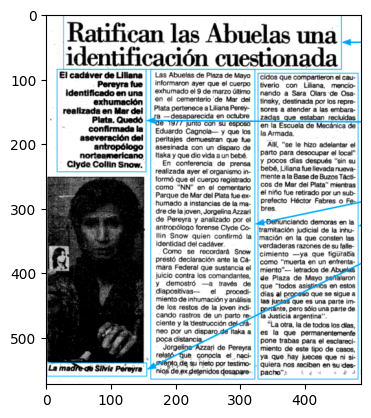

In [36]:
plt.imshow(original_image)

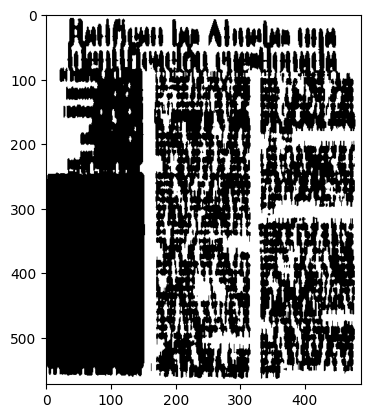

In [37]:
image = original_image.copy()

pipeline = [
    grayscale(),
    #laplacian(),
    blur((3,20)),
    binarize(60),
]

for func in pipeline:
    image = func(image)
    plt.imshow(image)
    #plt.show()

plt.imshow(image)

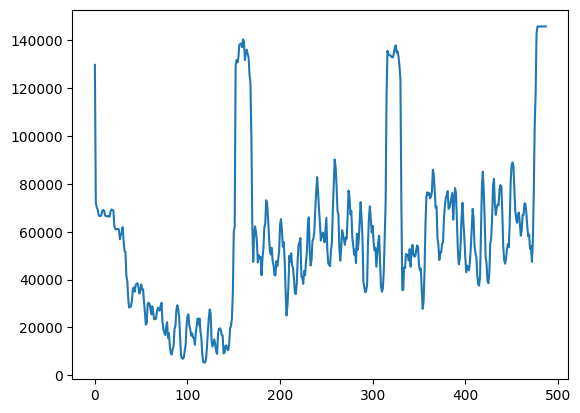

In [38]:
row_sum = np.sum(image, axis = 0)
plt.plot(row_sum)
plt.show()

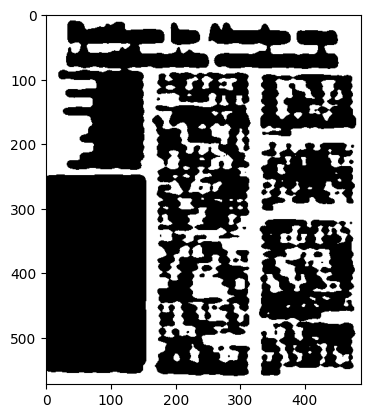

In [39]:
image = original_image.copy()

pipeline = [
    grayscale(),
    gaussian((27, 27)),
    binarize(60),
]

for func in pipeline:
    image = func(image)
    plt.imshow(image)
    #plt.show()

plt.imshow(image)

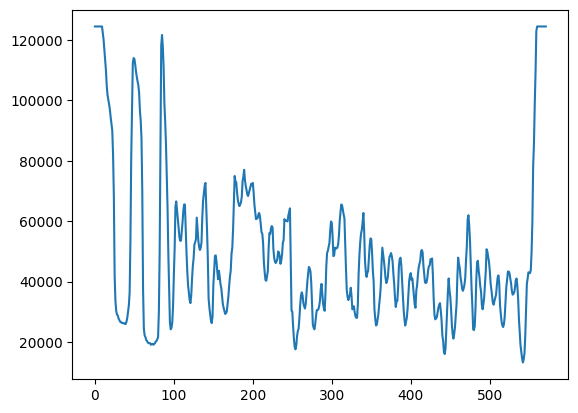

In [40]:
column_sum = np.sum(image, axis = 1)
plt.plot(column_sum)
plt.show()

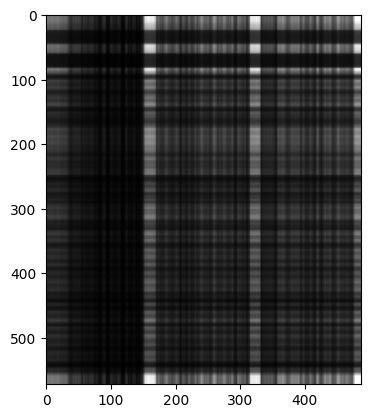

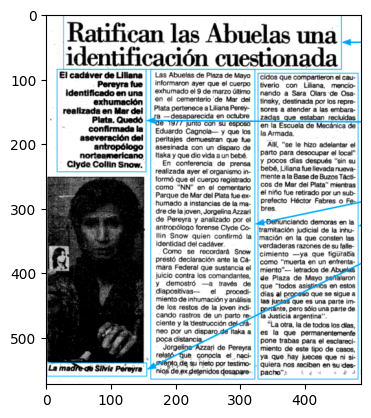

In [41]:
product = (column_sum.reshape(-1,1)@row_sum.reshape(1,-1))
product -= product.min()
product = product / product.max()
product *= 255

plt.imshow(product)
plt.show()
plt.imshow(original_image)
plt.show()

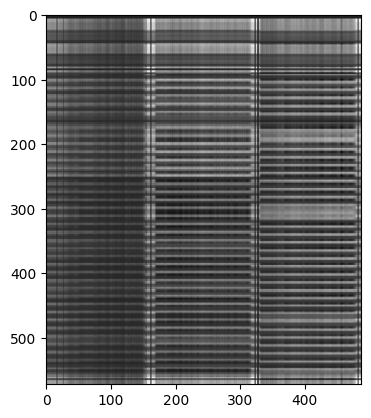

In [42]:
image = original_image.copy()

pipeline = [
    grayscale(),
    binarize(60),
    svd_compress(2),

]

for func in pipeline:
    image = func(image)
    plt.imshow(image)
    #plt.show()

plt.imshow(image)


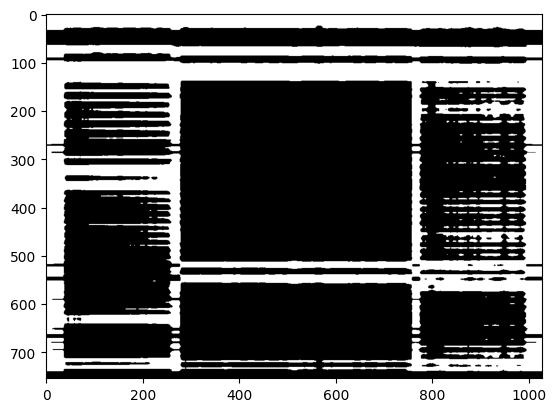

In [20]:
median = cv2.medianBlur(image, 3)
plt.imshow(median)